In [3]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)
#from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer



sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [4]:
path = path_join(abspath("."), "..", "..", "AutoData/random_search")
print(path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

datasets = ["cifar10"]

results = dict()


r = dict()
for d in datasets:
    p = dict()
    configs = []
    train_history = []
    runtime = []
    validation_error  = []
    pad_lower = []
    pad_upper = []
    pad_probability = []
    scale_lower = []
    scale_upper = []
    scale_probability = []
    crop_lower = []
    crop_upper = []
    crop_probability = []
    rotation_upper = []
    rotation_lower = []
    rotation_probability = []
    vertical_flip = []
    horizontal_flip = []
    
    
    
    n_runs = 800
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/random_search_%s_%d.json" % (d, d, i)
            filename = path_join(path, config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        runtime.append(res['used_budget'])
        configs.append(res['configs'])
        validation_error.append(res["validation_error"])
        pad_lower.append(res["configs"]["pad_lower"])
        pad_upper.append(res["configs"]["pad_upper"])
        pad_probability.append(res["configs"]["pad_probability"])
        crop_lower.append(res["configs"]["crop_lower"])
        crop_upper.append(res["configs"]["crop_upper"])
        crop_probability.append(res["configs"]["crop_probability"])
        scale_lower.append(res['configs']['scale_lower'])
        scale_upper.append(res['configs']['scale_upper'])
        scale_probability.append(res['configs']['scale_probability'])
        horizontal_flip.append(res['configs']['horizontal_flip'])
        vertical_flip.append(res['configs']['vertical_flip'])
        rotation_lower.append(res['configs']['rotation_lower'])
        rotation_upper.append(res['configs']['rotation_upper'])
        rotation_probability.append(res['configs']['rotation_probability'])


    p['validation_error'] = validation_error
    p["runtime"] = runtime
    p['configs'] = configs
    p['crop_lower'] = crop_lower
    p['crop_upper'] = crop_upper
    p['crop_probability'] = crop_probability
    p['pad_lower'] = pad_lower
    p['pad_upper'] = pad_upper
    p['pad_probability'] = pad_probability
    p["horizontal_flip"] = horizontal_flip
    p['vertical_flip'] = vertical_flip
    results[d] = p
   

    


/mhome/negassim/AutoDA/notebooks/../../AutoData/random_search


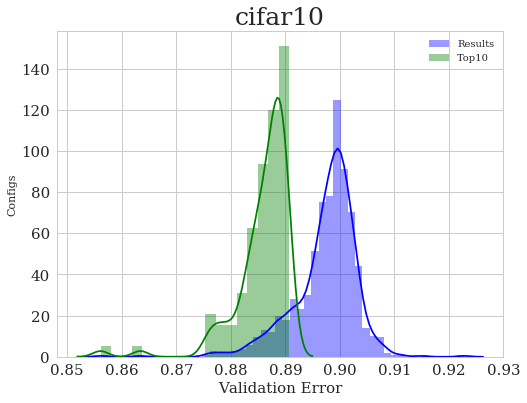

In [7]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
top10 = np.sort(validation_error)[:100]
sns.distplot(validation_error, label='Results', norm_hist=True,  color="blue")
sns.distplot(top10, label='Top10', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Configs")
plt.xlabel("Validation Error", fontsize=15)
plt.title(dataset, fontsize=25)

CDF Plots

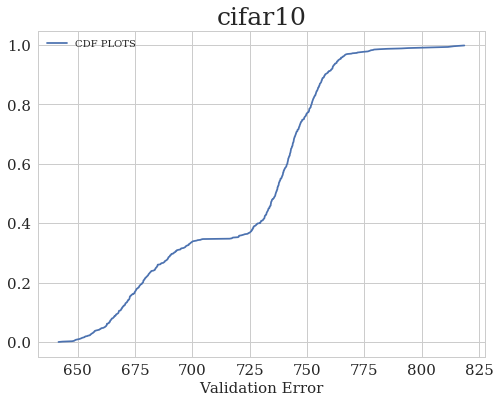

In [6]:
dataset = "cifar10"
sorted_error = np.sort(runtime)
yvals = np.arange(len(sorted_error)) / float(len(sorted_error))
plt.plot(sorted_error, yvals, label= "CDF PLOTS")
plt.legend(loc=2, fontsize=10)
plt.xlabel("Validation Error", fontsize=15)
plt.title(dataset, fontsize=25)


[0.0982392384148787, 0.09989013648179393, 0.05701887177676454, 0.001621962068036853, 0.09358077565760577, 0.06528144336102895, 0.024121795242070677, 0.040990542952146575, 0.019526114868852352, 0.014245022450683698]


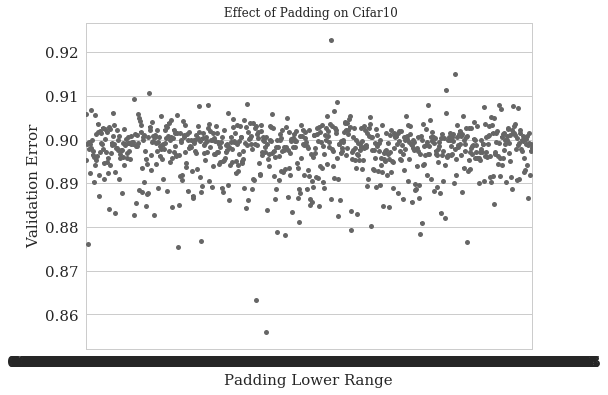

In [19]:
dataset = "cifar10"
validation_error = results[dataset]["validation_error"]
pad_lower= results[dataset]["pad_lower"]
print(pad_lower[:10])
ax = sns.boxplot(x=pad_lower, y=validation_error)
ax = sns.swarmplot(x=pad_lower, y=validation_error, color=".40")
ax.set_title(' Effect of Padding on Cifar10')

plt.xlabel("Padding Lower Range", size=15)
plt.ylabel("Validation Error", size=15)


Effect of Rescale on Mnist data

In [ ]:
dataset="mnist"
validation_error = results[dataset]["validation_error"]
rescale= results[dataset]["rescale"]
ax = sns.boxplot(x=rescale, y=validation_error)
#ax = sns.swarmplot(x=rescale, y=validation_error, color=".40")
ax.set_title(' Effect of Rescaling on Mnist data')
plt.xlabel("Rescale", size=15)
plt.ylabel("Validation Error", size=15)


Plot to show effect of Horizontal Flip on Mnist Data

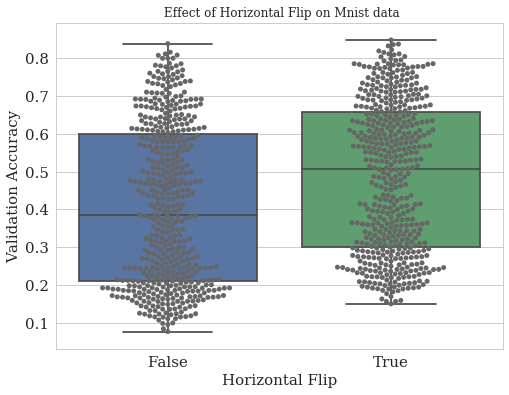

In [7]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_error"]
hor_flip= results[dataset]["horizontal_flip"]
ax = sns.boxplot(x=hor_flip, y=validation_accuracy)
ax = sns.swarmplot(x=hor_flip, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Horizontal Flip on Mnist data')
plt.xlabel("Horizontal Flip", size=15)
plt.ylabel("Validation Accuracy", size=15)

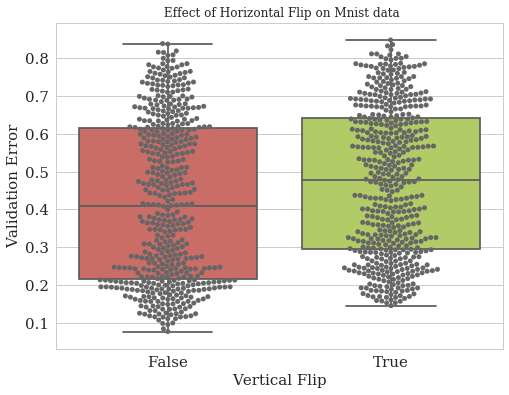

In [27]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_error"]
vertical_flip= results[dataset]["vertical_flip"]
ax = sns.boxplot(x=vertical_flip, y=validation_accuracy)
ax = sns.swarmplot(x=vertical_flip, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Horizontal Flip on Mnist data')
plt.xlabel("Vertical Flip", size=15)
plt.ylabel("Validation Error", size=15)

Effect of Rotation Range on Mnist Data

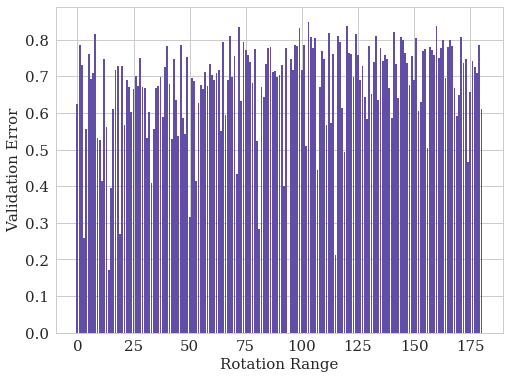

In [8]:
dataset = "mnist"
validation_error = results[dataset]["validation_error"]
rotation= results[dataset]["rotation"]
plt.bar(rotation, validation_error, color="#624ea7")
#ax = sns.boxplot(x=rotation, y=validation_accuracy)
#ax = sns.swarmplot(x=rotation, y=validation_accuracy, color=".40")
#ax.set_title(' Effect of Rotation on Mnist data')
plt.xlabel("Rotation Range", size=15)
plt.ylabel("Validation Error", size=15)


Make FANOVA Plots

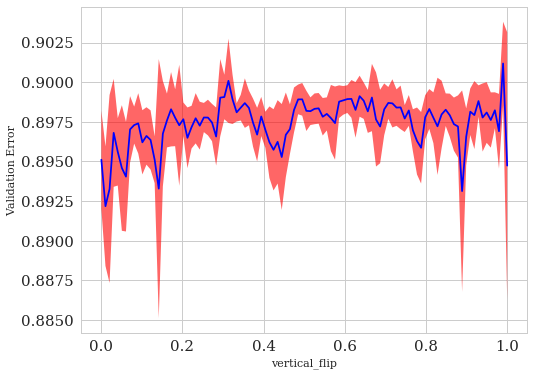

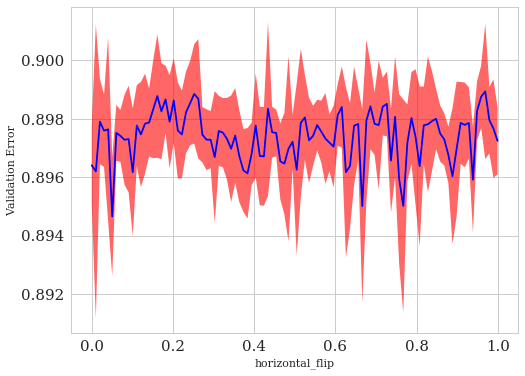

In [14]:
dataset = "cifar10"

order= ['vertical_flip', 'horizontal_flip'] # change order to params
#config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

f = fANOVA(X, y)
vis = visualizer.Visualizer(f, f.cs)

for i in range(len(order)):
    plt = vis.plot_marginal(i, show=False)
    plt.xlabel(order[i])
    plt.ylabel("Validation Error")
    plt.show()


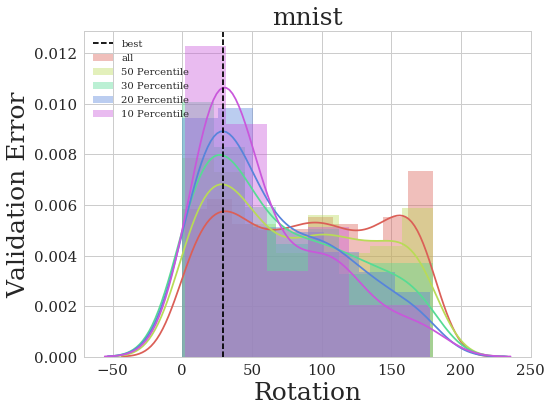

In [22]:
dataset = "mnist"

order= ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad'] # change order to params
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 3], label='all', norm_hist=True) # use named tuple here



p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 3], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 3], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 3], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 3], label='10 Percentile', norm_hist=True)

idx = np.argmin(y)
plt.axvline(X[idx, 3], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Rotation', size=25)
plt.ylabel('Validation Error', size=25)
plt.legend(loc=2)
plt.show()

[  0.61719635   0.           0.          29.           0.        ]


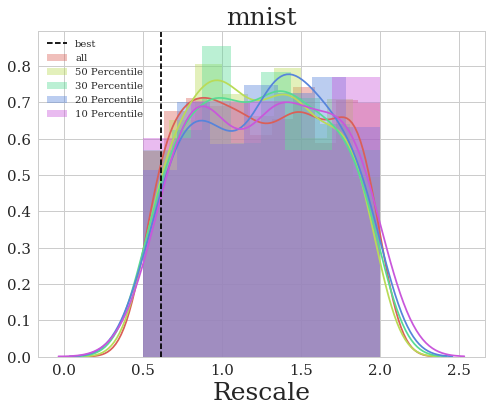

In [28]:
dataset = "mnist"

order= ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad'] # change order to params
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 0], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 0], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 0], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 0], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 0], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
print(X[idx])
plt.axvline(X[idx, 0], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Rescale', size=25)
plt.legend(loc=2)
plt.show()

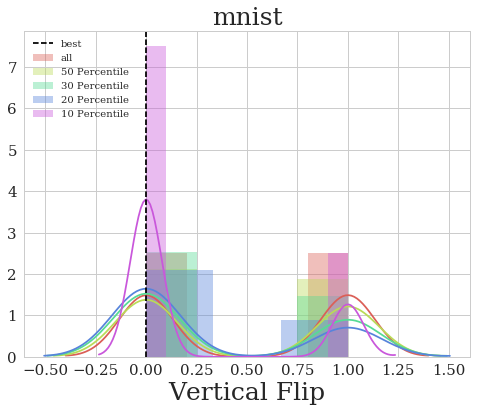

In [23]:
dataset = "mnist"

order= ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad'] # change order to params
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 1], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 1], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 1], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 1], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 1], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 1], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Vertical Flip', size=25)
plt.legend(loc=2)
plt.show()

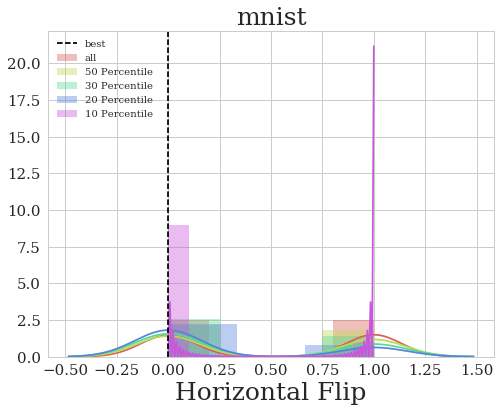

In [24]:
dataset = "mnist"

order= ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad'] # change order to params
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 2], label='all', norm_hist=True) # use named tuple here



p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 2], label='50 Percentile', norm_hist=True)

p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 2], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 2], label='20 Percentile', norm_hist=True)

p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 2], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 2], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Horizontal Flip', size=25)
plt.legend(loc=2)
plt.show()

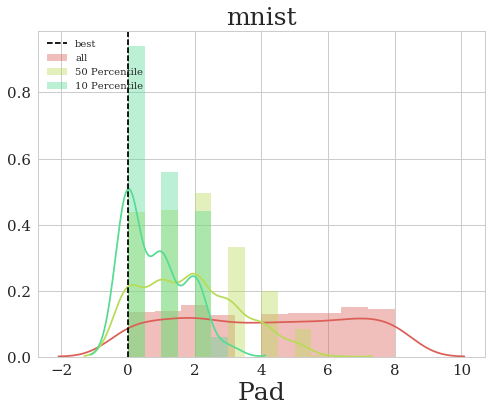

In [25]:
dataset = "mnist"

order= ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad'] # change order to params
config_space = ImageAugmentation.get_config_space()


X = []

for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])
            
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]

current_palette= sns.color_palette("hls", 5)

sns.set_palette(current_palette)
sns.distplot(X[:, 4], label='all', norm_hist=True) # use named tuple here


p = np.percentile(y, 50)
perc_50 = np.where(y < p)
sns.distplot(X[perc_50, 4], label='50 Percentile', norm_hist=True)
"""
p = np.percentile(y, 30)
perc_30 = np.where(y < p)
sns.distplot(X[perc_30, 4], label='30 Percentile', norm_hist=True)

p = np.percentile(y, 20)
perc_20 = np.where(y < p)
sns.distplot(X[perc_20, 4], label='20 Percentile', norm_hist=True)
"""
p = np.percentile(y, 10)
perc_10 = np.where(y < p)
sns.distplot(X[perc_10, 4], label='10 Percentile', norm_hist=True)


idx = np.argmin(y)
plt.axvline(X[idx, 4], linestyle="--", color="black", label="best")
plt.title(dataset, fontsize=25)
plt.xlabel('Pad', size=25)
plt.legend(loc=2)
plt.show()